## **Mounting Drive and Unzipping the dataset**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!unzip -uq "/content/drive/My Drive/Colab Notebooks/UNDP crop detection/v2-plant-seedlings-dataset.zip" -d "/content/drive/My Drive/Colab Notebooks/UNDP crop detection/plant-seedlings-dataset"

## **Import Libraries**

In [3]:
import numpy as np
import pandas as pd 
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os
print(os.listdir('/content/drive/My Drive/Colab Notebooks/UNDP crop detection/plant-seedlings-dataset'))

Using TensorFlow backend.


['Black-grass', 'Charlock', 'Cleavers', 'Common Chickweed', 'Common wheat', 'Fat Hen', 'Loose Silky-bent', 'Maize', 'Scentless Mayweed', 'Small-flowered Cranesbill', 'Sugar beet', 'Shepherds Purse', '.ipynb_checkpoints', 'training', 'testing', 'ShepherdтАЩs Purse', 'nonsegmentedv2']


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
import tensorflow as tf
import shutil
from tensorflow.keras.optimizers import RMSprop
from shutil import copyfile
from os import getcwd

In [0]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

## **Constants Definition**

In [0]:
FAST_RUN = False
IMAGE_WIDTH=128
IMAGE_HEIGHT=128
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3

## **Preparing the training data**

In [0]:
filenames = os.listdir('/content/drive/My Drive/Colab Notebooks/UNDP crop detection/plant-seedlings-dataset')
image_count = []
for filename in filenames:
    image_count.append(len(os.listdir('/content/drive/My Drive/Colab Notebooks/UNDP crop detection/plant-seedlings-dataset/'+filename))) 

df = pd.DataFrame({
    'filename': filenames,
    'image_count': image_count
})

In [7]:
df.head()

,filename,image_count
0,Black-grass,309
1,Charlock,452
2,Cleavers,335
3,Common Chickweed,713
4,Common wheat,253


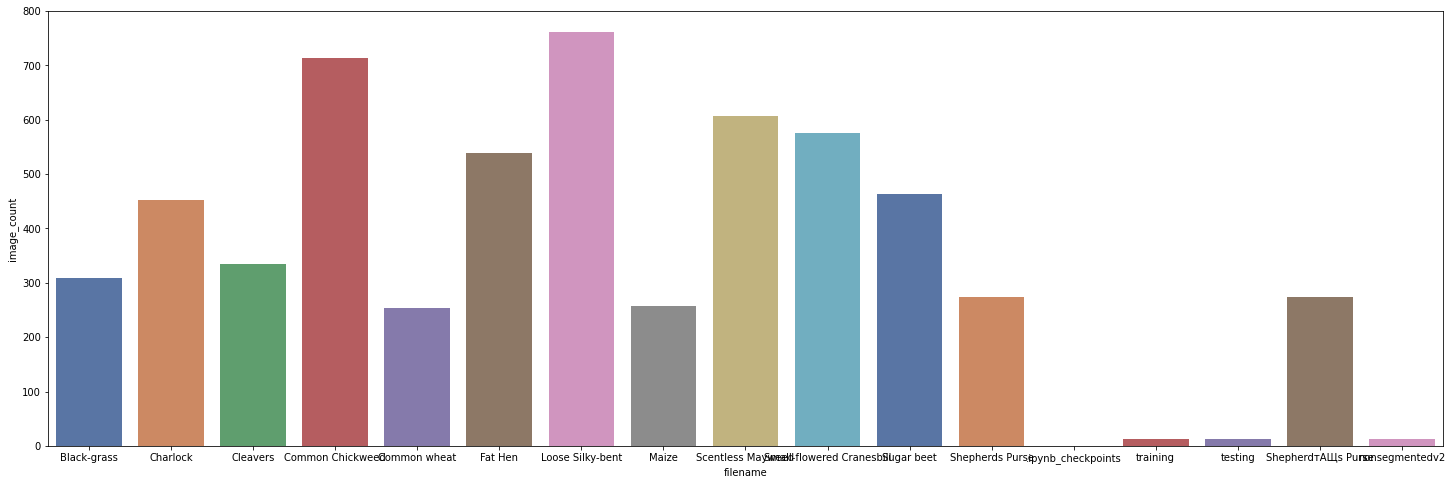

In [8]:
plt.figure(figsize=(25,8))
sns.barplot(x='filename', y='image_count', data=df, palette='deep')

## **Creating necessary directories**

In [0]:
try:
    os.mkdir('/content/drive/My Drive/Colab Notebooks/UNDP crop detection/plant-seedlings-dataset/training')
    os.mkdir('/content/drive/My Drive/Colab Notebooks/UNDP crop detection/plant-seedlings-dataset/testing')
    os.mkdir('/content/drive/My Drive/Colab Notebooks/UNDP crop detection/plant-seedlings-dataset/training/Black-grass')
    os.mkdir('/content/drive/My Drive/Colab Notebooks/UNDP crop detection/plant-seedlings-dataset/training/Charlock')
    os.mkdir('/content/drive/My Drive/Colab Notebooks/UNDP crop detection/plant-seedlings-dataset/training/Cleavers')
    os.mkdir('/content/drive/My Drive/Colab Notebooks/UNDP crop detection/plant-seedlings-dataset/training/Common Chickweed')
    os.mkdir('/content/drive/My Drive/Colab Notebooks/UNDP crop detection/plant-seedlings-dataset/training/Common wheat')
    os.mkdir('/content/drive/My Drive/Colab Notebooks/UNDP crop detection/plant-seedlings-dataset/training/Fat Hen')
    os.mkdir('/content/drive/My Drive/Colab Notebooks/UNDP crop detection/plant-seedlings-dataset/training/Loose Silky-bent')
    os.mkdir('/content/drive/My Drive/Colab Notebooks/UNDP crop detection/plant-seedlings-dataset/training/Maize')
    os.mkdir('/content/drive/My Drive/Colab Notebooks/UNDP crop detection/plant-seedlings-dataset/training/Scentless Mayweed')
    os.mkdir('/content/drive/My Drive/Colab Notebooks/UNDP crop detection/plant-seedlings-dataset/training/Shepherds Purse')
    os.mkdir('/content/drive/My Drive/Colab Notebooks/UNDP crop detection/plant-seedlings-dataset/training/Small-flowered Cranesbill')
    os.mkdir('/content/drive/My Drive/Colab Notebooks/UNDP crop detection/plant-seedlings-dataset/training/Sugar beet')
    
    print("Training directories created")
    print("")

    os.mkdir('/content/drive/My Drive/Colab Notebooks/UNDP crop detection/plant-seedlings-dataset/testing/Black-grass')
    os.mkdir('/content/drive/My Drive/Colab Notebooks/UNDP crop detection/plant-seedlings-dataset/testing/Charlock')
    os.mkdir('/content/drive/My Drive/Colab Notebooks/UNDP crop detection/plant-seedlings-dataset/testing/Cleavers')
    os.mkdir('/content/drive/My Drive/Colab Notebooks/UNDP crop detection/plant-seedlings-dataset/testing/Common Chickweed')
    os.mkdir('/content/drive/My Drive/Colab Notebooks/UNDP crop detection/plant-seedlings-dataset/testing/Common wheat')
    os.mkdir('/content/drive/My Drive/Colab Notebooks/UNDP crop detection/plant-seedlings-dataset/testing/Fat Hen')
    os.mkdir('/content/drive/My Drive/Colab Notebooks/UNDP crop detection/plant-seedlings-dataset/testing/Loose Silky-bent')
    os.mkdir('/content/drive/My Drive/Colab Notebooks/UNDP crop detection/plant-seedlings-dataset/testing/Maize')
    os.mkdir('/content/drive/My Drive/Colab Notebooks/UNDP crop detection/plant-seedlings-dataset/testing/Scentless Mayweed')
    os.mkdir('/content/drive/My Drive/Colab Notebooks/UNDP crop detection/plant-seedlings-dataset/testing/Shepherds Purse')
    os.mkdir('/content/drive/My Drive/Colab Notebooks/UNDP crop detection/plant-seedlings-dataset/testing/Small-flowered Cranesbill')
    os.mkdir('/content/drive/My Drive/Colab Notebooks/UNDP crop detection/plant-seedlings-dataset/testing/Sugar beet')

    print("Testing directories created")
except OSError:
    pass

#### **Train-test dataset Split function**

In [0]:
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
    dataset = []
    
    for unitData in os.listdir(SOURCE):
        data = SOURCE + unitData
        if(os.path.getsize(data) > 0):
            dataset.append(unitData)
        else:
            print('Skipped ' + unitData)
            print('Invalid file i.e zero size')
    
    train_set_length = int(len(dataset) * SPLIT_SIZE)
    test_set_length = int(len(dataset) - train_set_length)
    shuffled_set = random.sample(dataset, len(dataset))
    train_set = dataset[0:train_set_length]
    test_set = dataset[-test_set_length:]
       
    for unitData in train_set:
        temp_train_set = SOURCE + unitData
        final_train_set = TRAINING + unitData
        copyfile(temp_train_set, final_train_set)
    
    for unitData in test_set:
        temp_test_set = SOURCE + unitData
        final_test_set = TESTING + unitData
        copyfile(temp_test_set, final_test_set)

Directory assignment to variables:

In [0]:
#**************************Black_grass*****************************
BLACK_GRASS_SOURCE_DIR = '/content/drive/My Drive/Colab Notebooks/UNDP crop detection/plant-seedlings-dataset/Black-grass/'
TRAINING_BLACK_GRASS_DIR = '/content/drive/My Drive/Colab Notebooks/UNDP crop detection/plant-seedlings-dataset/training/Black-grass/'
TESTING_BLACK_GRASS_DIR = '/content/drive/My Drive/Colab Notebooks/UNDP crop detection/plant-seedlings-dataset/testing/Black-grass/'

#**************************Charlock*****************************
CHARLOCK_SOURCE_DIR = '/content/drive/My Drive/Colab Notebooks/UNDP crop detection/plant-seedlings-dataset/Charlock/'
TRAINING_CHARLOCK_DIR = '/content/drive/My Drive/Colab Notebooks/UNDP crop detection/plant-seedlings-dataset/training/Charlock/'
TESTING_CHARLOCK_DIR = '/content/drive/My Drive/Colab Notebooks/UNDP crop detection/plant-seedlings-dataset/testing/Charlock/'

#**************************Cleavers*****************************
CLEAVERS_SOURCE_DIR = '/content/drive/My Drive/Colab Notebooks/UNDP crop detection/plant-seedlings-dataset/Cleavers/'
TRAINING_CLEAVERS_DIR = '/content/drive/My Drive/Colab Notebooks/UNDP crop detection/plant-seedlings-dataset/training/Cleavers/'
TESTING_CLEAVERS_DIR = '/content/drive/My Drive/Colab Notebooks/UNDP crop detection/plant-seedlings-dataset/testing/Cleavers/'

#**************************Common Chickweed*****************************
COMMON_CHICKWEED_SOURCE_DIR = '/content/drive/My Drive/Colab Notebooks/UNDP crop detection/plant-seedlings-dataset/Common Chickweed/'
TRAINING_COMMON_CHICKWEED_DIR = '/content/drive/My Drive/Colab Notebooks/UNDP crop detection/plant-seedlings-dataset/training/Common Chickweed/'
TESTING_COMMON_CHICKWEED_DIR = '/content/drive/My Drive/Colab Notebooks/UNDP crop detection/plant-seedlings-dataset/testing/Common Chickweed/'

#**************************Common Wheat*****************************
COMMON_WHEAT_SOURCE_DIR = '/content/drive/My Drive/Colab Notebooks/UNDP crop detection/plant-seedlings-dataset/Common wheat/'
TRAINING_COMMON_WHEAT_DIR = '/content/drive/My Drive/Colab Notebooks/UNDP crop detection/plant-seedlings-dataset/training/Common wheat/'
TESTING_COMMON_WHEAT_DIR = '/content/drive/My Drive/Colab Notebooks/UNDP crop detection/plant-seedlings-dataset/testing/Common wheat/'

#**************************Fat Hen*****************************
FAT_HEN_SOURCE_DIR = '/content/drive/My Drive/Colab Notebooks/UNDP crop detection/plant-seedlings-dataset/Fat Hen/'
TRAINING_FAT_HEN_DIR = '/content/drive/My Drive/Colab Notebooks/UNDP crop detection/plant-seedlings-dataset/training/Fat Hen/'
TESTING_FAT_HEN_DIR = '/content/drive/My Drive/Colab Notebooks/UNDP crop detection/plant-seedlings-dataset/testing/Fat Hen/'

#**************************Loose Silky-bent*****************************
LOOSE_SILKY_BENT_SOURCE_DIR = '/content/drive/My Drive/Colab Notebooks/UNDP crop detection/plant-seedlings-dataset/Loose Silky-bent/'
TRAINING_LOOSE_SILKY_BENT_DIR = '/content/drive/My Drive/Colab Notebooks/UNDP crop detection/plant-seedlings-dataset/training/Loose Silky-bent/'
TESTING_LOOSE_SILKY_BENT_DIR = '/content/drive/My Drive/Colab Notebooks/UNDP crop detection/plant-seedlings-dataset/testing/Loose Silky-bent/'

#**************************Maize*****************************
MAIZE_SOURCE_DIR = '/content/drive/My Drive/Colab Notebooks/UNDP crop detection/plant-seedlings-dataset/Maize/'
TRAINING_MAIZE_DIR = '/content/drive/My Drive/Colab Notebooks/UNDP crop detection/plant-seedlings-dataset/training/Maize/'
TESTING_MAIZE_DIR = '/content/drive/My Drive/Colab Notebooks/UNDP crop detection/plant-seedlings-dataset/testing/Maize/'

#**************************Scentless Mayweed*****************************
SCENTLESS_MAYWEED_SOURCE_DIR = '/content/drive/My Drive/Colab Notebooks/UNDP crop detection/plant-seedlings-dataset/Scentless Mayweed/'
TRAINING_SCENTLESS_MAYWEED_DIR = '/content/drive/My Drive/Colab Notebooks/UNDP crop detection/plant-seedlings-dataset/training/Scentless Mayweed/'
TESTING_SCENTLESS_MAYWEED_DIR = '/content/drive/My Drive/Colab Notebooks/UNDP crop detection/plant-seedlings-dataset/testing/Scentless Mayweed/'

#**************************Shepherds Purse*****************************
SHEPHERDS_PURSE_SOURCE_DIR = '/content/drive/My Drive/Colab Notebooks/UNDP crop detection/plant-seedlings-dataset/Shepherds Purse/'
TRAINING_SHEPHERDS_PURSE_DIR = '/content/drive/My Drive/Colab Notebooks/UNDP crop detection/plant-seedlings-dataset/training/Shepherds Purse/'
TESTING_SHEPHERDS_PURSE_DIR = '/content/drive/My Drive/Colab Notebooks/UNDP crop detection/plant-seedlings-dataset/testing/Shepherds Purse/'

#**************************Small Flowered Cranesbill*****************************
SMALL_FLOWERED_CRANESBILL_SOURCE_DIR = '/content/drive/My Drive/Colab Notebooks/UNDP crop detection/plant-seedlings-dataset/Small-flowered Cranesbill/'
TRAINING_SMALL_FLOWERED_CRANESBILL_DIR = '/content/drive/My Drive/Colab Notebooks/UNDP crop detection/plant-seedlings-dataset/training/Small-flowered Cranesbill/'
TESTING_SMALL_FLOWERED_CRANESBILL_DIR = '/content/drive/My Drive/Colab Notebooks/UNDP crop detection/plant-seedlings-dataset/testing/Small-flowered Cranesbill/'

#**************************Sugar Beet*****************************
SUGAR_BEET_SOURCE_DIR = '/content/drive/My Drive/Colab Notebooks/UNDP crop detection/plant-seedlings-dataset/Sugar beet/'
TRAINING_SUGAR_BEET_DIR = '/content/drive/My Drive/Colab Notebooks/UNDP crop detection/plant-seedlings-dataset/training/Sugar beet/'
TESTING_SUGAR_BEET_DIR = '/content/drive/My Drive/Colab Notebooks/UNDP crop detection/plant-seedlings-dataset/testing/Sugar beet/'


In [0]:
split_size = .7

split_data(BLACK_GRASS_SOURCE_DIR, TRAINING_BLACK_GRASS_DIR, TESTING_BLACK_GRASS_DIR, split_size)

split_data(CHARLOCK_SOURCE_DIR, TRAINING_CHARLOCK_DIR, TESTING_CHARLOCK_DIR, split_size)

split_data(CLEAVERS_SOURCE_DIR, TRAINING_CLEAVERS_DIR, TESTING_CLEAVERS_DIR, split_size)

split_data(COMMON_CHICKWEED_SOURCE_DIR, TRAINING_COMMON_CHICKWEED_DIR, TESTING_COMMON_CHICKWEED_DIR, split_size)

split_data(COMMON_WHEAT_SOURCE_DIR, TRAINING_COMMON_WHEAT_DIR, TESTING_COMMON_WHEAT_DIR, split_size)

split_data(FAT_HEN_SOURCE_DIR, TRAINING_FAT_HEN_DIR, TESTING_FAT_HEN_DIR, split_size)

split_data(LOOSE_SILKY_BENT_SOURCE_DIR, TRAINING_LOOSE_SILKY_BENT_DIR, TESTING_LOOSE_SILKY_BENT_DIR, split_size)

split_data(MAIZE_SOURCE_DIR, TRAINING_MAIZE_DIR, TESTING_MAIZE_DIR, split_size)

split_data(SCENTLESS_MAYWEED_SOURCE_DIR, TRAINING_SCENTLESS_MAYWEED_DIR, TESTING_SCENTLESS_MAYWEED_DIR, split_size)

split_data(SHEPHERDS_PURSE_SOURCE_DIR, TRAINING_SHEPHERDS_PURSE_DIR, TESTING_SHEPHERDS_PURSE_DIR, split_size)

split_data(SMALL_FLOWERED_CRANESBILL_SOURCE_DIR, TRAINING_SMALL_FLOWERED_CRANESBILL_DIR, TESTING_SMALL_FLOWERED_CRANESBILL_DIR, split_size)

split_data(SUGAR_BEET_SOURCE_DIR, TRAINING_SUGAR_BEET_DIR, TESTING_SUGAR_BEET_DIR, split_size)


In [16]:
print("Black-grass: training ==> " + str(len(os.listdir(TRAINING_BLACK_GRASS_DIR))) + " testing ==> " + str(len(os.listdir(TESTING_BLACK_GRASS_DIR))))
print("Charlock: training ==> " + str(len(os.listdir(TRAINING_CHARLOCK_DIR))) + " testing ==> " + str(len(os.listdir(TESTING_CHARLOCK_DIR))))
print("Cleavers: training ==> " + str(len(os.listdir(TRAINING_CLEAVERS_DIR))) + " testing ==> " + str(len(os.listdir(TESTING_CLEAVERS_DIR))))
print("Common Chickweed: training ==> " + str(len(os.listdir(TRAINING_COMMON_CHICKWEED_DIR))) + " testing ==> " + str(len(os.listdir(TESTING_COMMON_CHICKWEED_DIR))))
print("Common wheat: training ==> " + str(len(os.listdir(TRAINING_COMMON_WHEAT_DIR))) + " testing ==> " + str(len(os.listdir(TESTING_COMMON_WHEAT_DIR))))
print("Fat Hen: training ==> " + str(len(os.listdir(TRAINING_FAT_HEN_DIR))) + " testing ==> " + str(len(os.listdir(TESTING_FAT_HEN_DIR))))
print("Loose Silky-bent: training ==> " + str(len(os.listdir(TRAINING_LOOSE_SILKY_BENT_DIR))) + " testing ==> " + str(len(os.listdir(TESTING_LOOSE_SILKY_BENT_DIR))))
print("Maize: training ==> " + str(len(os.listdir(TRAINING_MAIZE_DIR))) + " testing ==> " + str(len(os.listdir(TESTING_MAIZE_DIR))))
print("Scentless Mayweed: training ==> " + str(len(os.listdir(TRAINING_SCENTLESS_MAYWEED_DIR))) + " testing ==> " + str(len(os.listdir(TESTING_SCENTLESS_MAYWEED_DIR))))
print("Shepherds Purse: training ==> " + str(len(os.listdir(TRAINING_SHEPHERDS_PURSE_DIR))) + " testing ==> " + str(len(os.listdir(TESTING_SHEPHERDS_PURSE_DIR))))
print("Small-flowered Cranesbill: training ==> " + str(len(os.listdir(TRAINING_SMALL_FLOWERED_CRANESBILL_DIR))) + " testing ==> " + str(len(os.listdir(TESTING_SMALL_FLOWERED_CRANESBILL_DIR))))
print("Sugar beet: training ==> " + str(len(os.listdir(TRAINING_SUGAR_BEET_DIR))) + " testing ==> " + str(len(os.listdir(TESTING_SUGAR_BEET_DIR))))

Black-grass: training ==> 216 testing ==> 93
Charlock: training ==> 316 testing ==> 136
Cleavers: training ==> 234 testing ==> 101
Common Chickweed: training ==> 499 testing ==> 214
Common wheat: training ==> 177 testing ==> 76
Fat Hen: training ==> 376 testing ==> 162
Loose Silky-bent: training ==> 533 testing ==> 229
Maize: training ==> 179 testing ==> 78
Scentless Mayweed: training ==> 424 testing ==> 183
Shepherds Purse: training ==> 191 testing ==> 83
Small-flowered Cranesbill: training ==> 403 testing ==> 173
Sugar beet: training ==> 324 testing ==> 139


## **Train Generator and Validation Generator**

In [17]:
train_dir = '/content/drive/My Drive/Colab Notebooks/UNDP crop detection/plant-seedlings-dataset/training'

train_datagen = ImageDataGenerator(rescale=1.0/255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(train_dir, 
                                                    batch_size=10, 
                                                    class_mode='categorical', 
                                                    target_size=IMAGE_SIZE)


validation_dir = '/content/drive/My Drive/Colab Notebooks/UNDP crop detection/plant-seedlings-dataset/testing'
validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_directory(validation_dir, 
                                                         batch_size=10, 
                                                         class_mode='categorical', 
                                                         target_size=IMAGE_SIZE)




Found 3872 images belonging to 12 classes.
Found 1667 images belonging to 12 classes.


## **Model Generation**

In [19]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())

model.add(Dropout(0.5))
model.add(Dense(12, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 126, 126, 32)      128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 61, 61, 64)        256       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 64)       

### **Callbacks**

In [0]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

earlystop = EarlyStopping(patience=10)

In [0]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [0]:
callbacks = [earlystop, learning_rate_reduction]

In [0]:
total_train = 3872
total_validate = 1667
batch_size = 10

## **Model Implementation**

In [25]:
epochs=3 if FAST_RUN else 50

history = model.fit_generator(
    train_generator, 
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=callbacks
)

Epoch 1/50
387/387 [==============================] - 77s 198ms/step - loss: 2.6131 - accuracy: 0.2872 - val_loss: 4.0636 - val_accuracy: 0.1530
Epoch 2/50
  2/387 [..............................] - ETA: 31s - loss: 1.7719 - accuracy: 0.5000

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:1042: RuntimeWarning: Reduce LR on plateau conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_accuracy,loss,accuracy,lr
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


387/387 [==============================] - 67s 173ms/step - loss: 1.9022 - accuracy: 0.4194 - val_loss: 4.8128 - val_accuracy: 0.3319
Epoch 3/50
387/387 [==============================] - 67s 173ms/step - loss: 1.5599 - accuracy: 0.5093 - val_loss: 1.4840 - val_accuracy: 0.5963
Epoch 4/50
387/387 [==============================] - 67s 172ms/step - loss: 1.3279 - accuracy: 0.5642 - val_loss: 2.2785 - val_accuracy: 0.5069
Epoch 5/50
387/387 [==============================] - 67s 173ms/step - loss: 1.1544 - accuracy: 0.6207 - val_loss: 4.9910 - val_accuracy: 0.2818
Epoch 6/50
387/387 [==============================] - 67s 173ms/step - loss: 1.0402 - accuracy: 0.6554 - val_loss: 1.2530 - val_accuracy: 0.6325
Epoch 7/50
387/387 [==============================] - 66s 171ms/step - loss: 0.9707 - accuracy: 0.6872 - val_loss: 1.7583 - val_accuracy: 0.5468
Epoch 8/50
387/387 [==============================] - 66s 170ms/step - loss: 0.9053 - accuracy: 0.7012 - val_loss: 1.4339 - val_accuracy: 0.6

#### **Save Model weights**

In [0]:
model.save_weights("model.h5")

## **Visualizing Training**

In [0]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

In [0]:
epochs=range(len(acc))

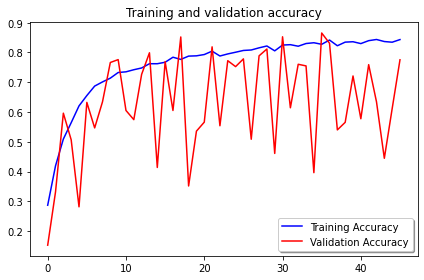

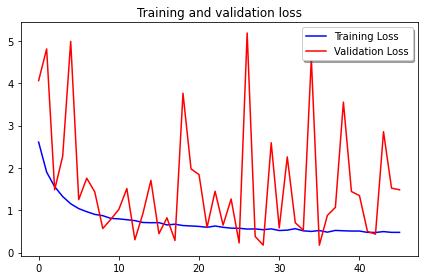

In [38]:
#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'b', label="Training Accuracy")
plt.plot(epochs, val_acc, 'r', label="Validation Accuracy")
plt.title('Training and validation accuracy')
legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------

plt.plot(epochs, loss, 'b', label="Training Loss")
plt.plot(epochs, val_loss, 'r', label="Validation Loss")
plt.title('Training and validation loss')

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()